<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:140%;
            font-family:Verdana;
            letter-spacing:1px;
            padding: 20px;
            text-align:center;
            font-weight: bold;">
   SIGN LANGUAGE DETECTION USING YOLO11
</div>


<div style="text-align: center; font-size:140%; font-weight: bold; color: #20a0ff;">
     Computer Vision Project: Yolo11 - Roboflow - OpenCV
</div>

    
---
    
<div style="text-align: center;">
  <b>Duygu Jones | Data Scientist | Oct 2024 </b>
    
  <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</div>    

![](https://github.com/Duygu-Jones/Deep-Learning-Projects/raw/main/03_Sign_Language_YOLO11/ASL_output_img.png?raw=true)

- Github Project Repository: https://github.com/Duygu-Jones/Deep-Learning-Projects/tree/main/03_Sign_Language_YOLO11

## **Sign Language Detection with YOLO11 🤟**

💡 In this project, **Ultralytics YOLO11** model has been used [Ultralytics YOLO11 GitHub Repository](https://github.com/ultralytics/ultralytics). This model is not only powerful for real-time object detection but also capable of a wide range of tasks such as **Object Detection**, **Classification**, **Instance Segmentation**, **Semantic Segmentation**, and **Pose Estimation**. For this project, the **small version** of YOLO11 for **object detection** was used to handle **real-time sign detection** efficiently, making it ideal for recognizing hand gestures.

### **About YOLO11**
YOLOv11 builds upon the advancements made in previous versions (YOLOv9, YOLOv10), featuring improved architecture, better feature extraction, and optimized training techniques. The model can handle multiple tasks across different domains and is highly scalable, from mobile CPUs to powerful GPUs. YOLO11 is available in 5 different sizes, ranging from **2.6M to 56.9M parameters**, and achieves mAP scores between **39.5 and 54.7** on the **COCO dataset**, which was used for initial pre-training.

For this project, the **small version** of YOLO11 was used for **object detection** to efficiently detect hand signs in real-time.

### **Dataset Information**
The **American Sign Language (ASL) dataset** used in this project was sourced from [**Roboflow Universe/duyguj/american-sign-language-letters**](https://app.roboflow.com/duyguj/american-sign-language-letters-vouo0/1). All images in the dataset were pre-labeled, ensuring accurate training data. Additionally, **data augmentation** techniques were applied within Roboflow to increase the variability of the dataset, improving the model’s generalization. Techniques such as flipping, rotation, and brightness adjustments were employed.

This dataset contains a total of **1224 images**, which are split into three sets:

- **Train Set**: 1008 images (82%)
- **Validation Set**: 144 images (12%)
- **Test Set**: 72 images (6%)

#### Preprocessing:
- **Auto-Orient**: Applied to ensure the images are properly aligned.
- **Resize**: All images are resized to fit within **640x640 pixels**.

#### Data Augmentation:
Each training example has two outputs due to augmentation, which includes:
- **Rotation**: Between **-15° and +15°** to simulate different hand orientations.
- **Exposure**: Adjustments between **-10% and +10%** to account for varying lighting conditions.
- **Blur**: Up to **2px** to simulate motion or camera blur.

This setup is intended to improve the model’s ability to generalize by exposing it to varied inputs.

### **Training Process**
The YOLOv11 model was **fine-tuned** on this ASL dataset to specialize in object detection for sign language. This training process included:
- **Dataset Augmentation**: Using Roboflow to enhance the dataset with transformations.
- **Model Training**: YOLOv11 was trained using this enhanced dataset, and the performance was validated using a separate validation dataset.
- **Testing**: After training, the model was tested on a **dedicated test set** to evaluate its ability to predict unseen data.

### **Performance and Observations**
The **final model** was tested on random **sign language images and videos** to observe its real-world performance. The results showed promising outcomes for detecting different ASL signs in real-time, demonstrating the effectiveness of the YOLO11 architecture in handling complex, gesture-based tasks.

### **Tools Used**
- **YOLO11 (Object Detection)**: For real-time sign detection
- **OpenCV**: For image and video processing
- **Python**: For implementation and integration

### **Next Steps**
- Improve detection accuracy for complex signs
- Expand the model to support more sign languages and gestures

Links:
- [Ultralytics YOLO11 GitHub Repository](https://github.com/ultralytics/ultralytics)  
- [Roboflow Universe ASL Dataset](https://universe.roboflow.com/)

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Setup and Initialization</p> 

### Access to GPU

We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`.

In [ ]:
# GPU Access 
#!nvidia-smi

### Install YOLO11 via Ultralytics

In [1]:
!pip install ultralytics supervision roboflow

from IPython import display
display.clear_output()

!pip install ultralytics --quiet
import ultralytics
ultralytics.checks()

Ultralytics 8.3.6 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


### Load the Dataset

##### Configure API keys to Load the Dataset

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.
- **Roboflow**: Go to your [`Roboflow Dataset Download`](https://app.roboflow.com/settings/api) -> Select YOLO model -> Select `Show download code` -> click `Copy`. 
    - In **Colab**: go to the left pane and click on `Secrets` (🔑). Store the Roboflow API Key under a username.
    - In **Kaggle**: Go to `Add-ons` → `Secrets` → `Add Secret` (🔑) and store your Kaggle API key and username.

In [2]:
# Save the API key in Kaggle
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("my_api_key")

In [3]:
# Roboflow Dataset API Code
!pip install roboflow --quiet
from roboflow import Roboflow

rf = Roboflow(secret_value_0)

project = rf.workspace("duyguj").project("american-sign-language-letters-vouo0")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to American-Sign-Language-Letters-1 in yolov11:: 100%|██████████| 2424/2424 [00:00<00:00, 8137.76it/s]


<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Model Training</p> 

In [4]:
# Changing to the working directory in Kaggle
%cd /kaggle/working

# Training the YOLO model
!yolo task=detect mode=train model=yolo11n.pt data=/kaggle/working/American-Sign-Language-Letters-1/data.yaml epochs=10 imgsz=640 plots=True

#Results saved to runs/detect/train
#Learn more at https://docs.ultralytics.com/modes/train

/kaggle/working
100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 68.2MB/s]
Ultralytics 8.3.6 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/American-Sign-Language-Letters-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

In [5]:
# The list of files from the completed training is saved;
!ls /kaggle/working/runs/detect/train/

F1_curve.png					   results.png
PR_curve.png					   train_batch0.jpg
P_curve.png					   train_batch1.jpg
R_curve.png					   train_batch2.jpg
args.yaml					   val_batch0_labels.jpg
confusion_matrix.png				   val_batch0_pred.jpg
confusion_matrix_normalized.png			   val_batch1_labels.jpg
events.out.tfevents.1728284614.35bd55a0240b.102.0  val_batch1_pred.jpg
labels.jpg					   val_batch2_labels.jpg
labels_correlogram.jpg				   val_batch2_pred.jpg
results.csv					   weights


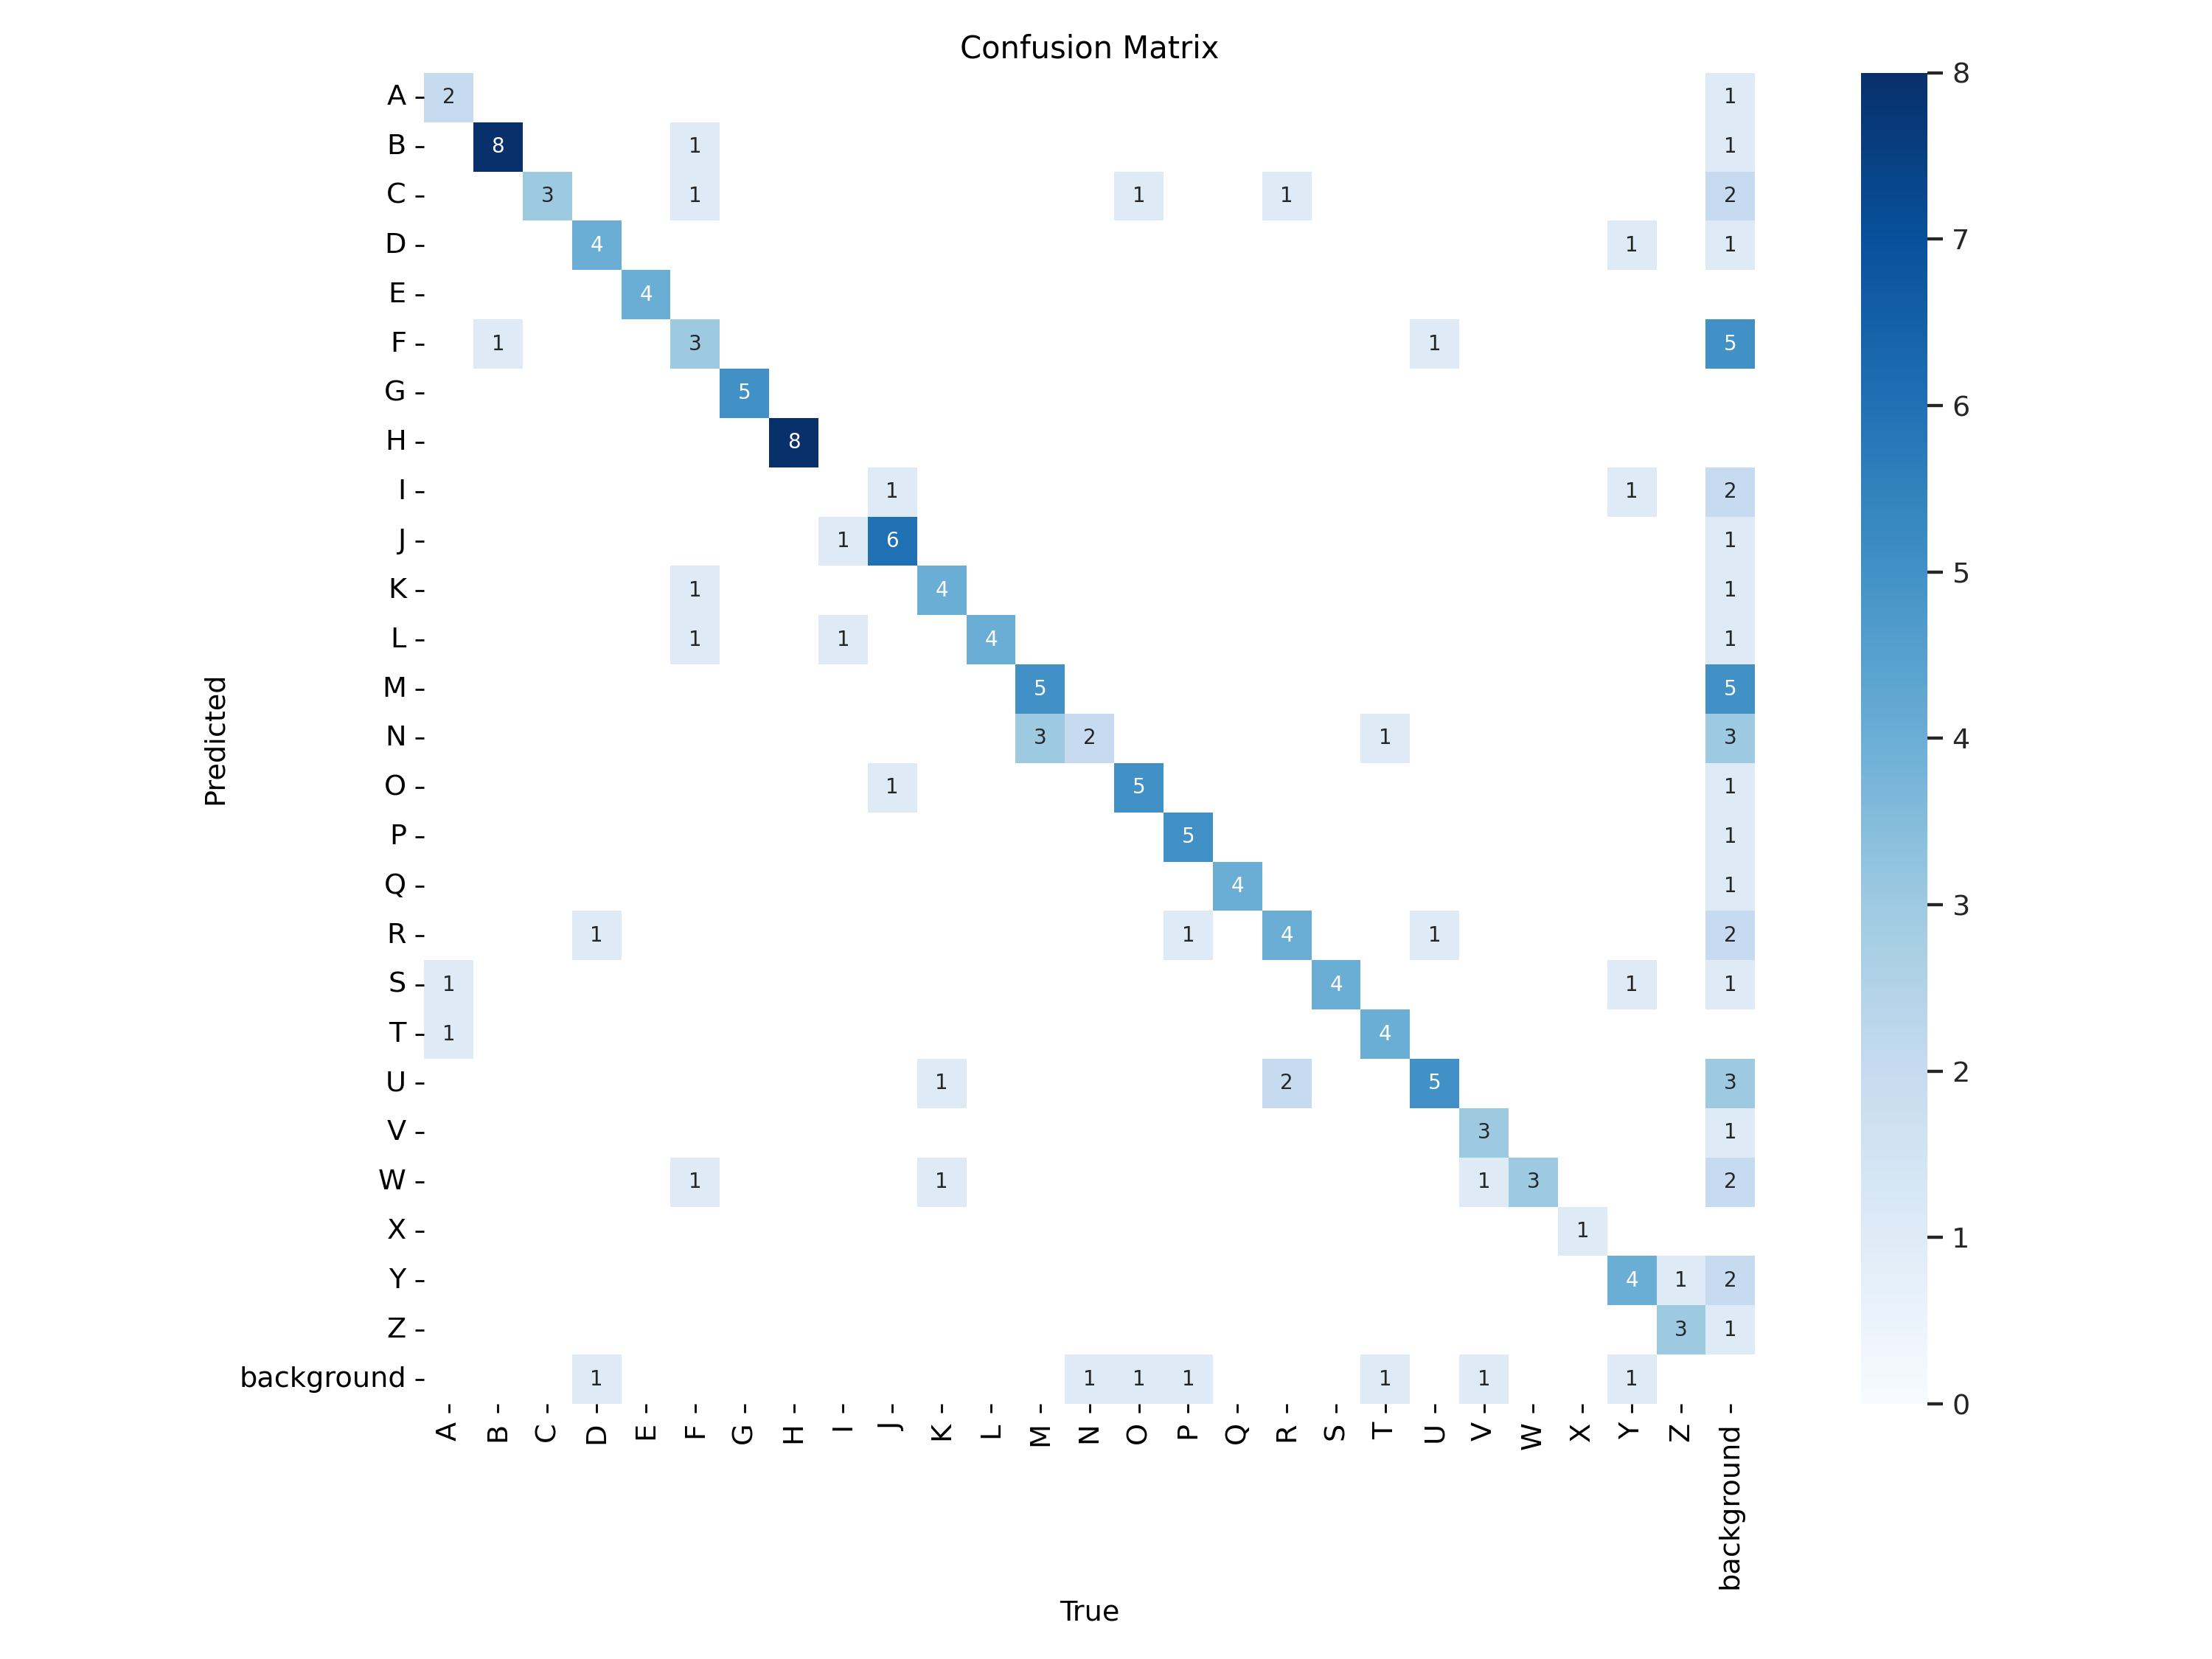

In [6]:
from IPython.display import Image as IPyImage

# Display the confusion matrix image from the specified directory in Kaggle
IPyImage(filename='/kaggle/working/runs/detect/train/confusion_matrix.png', width=1000)

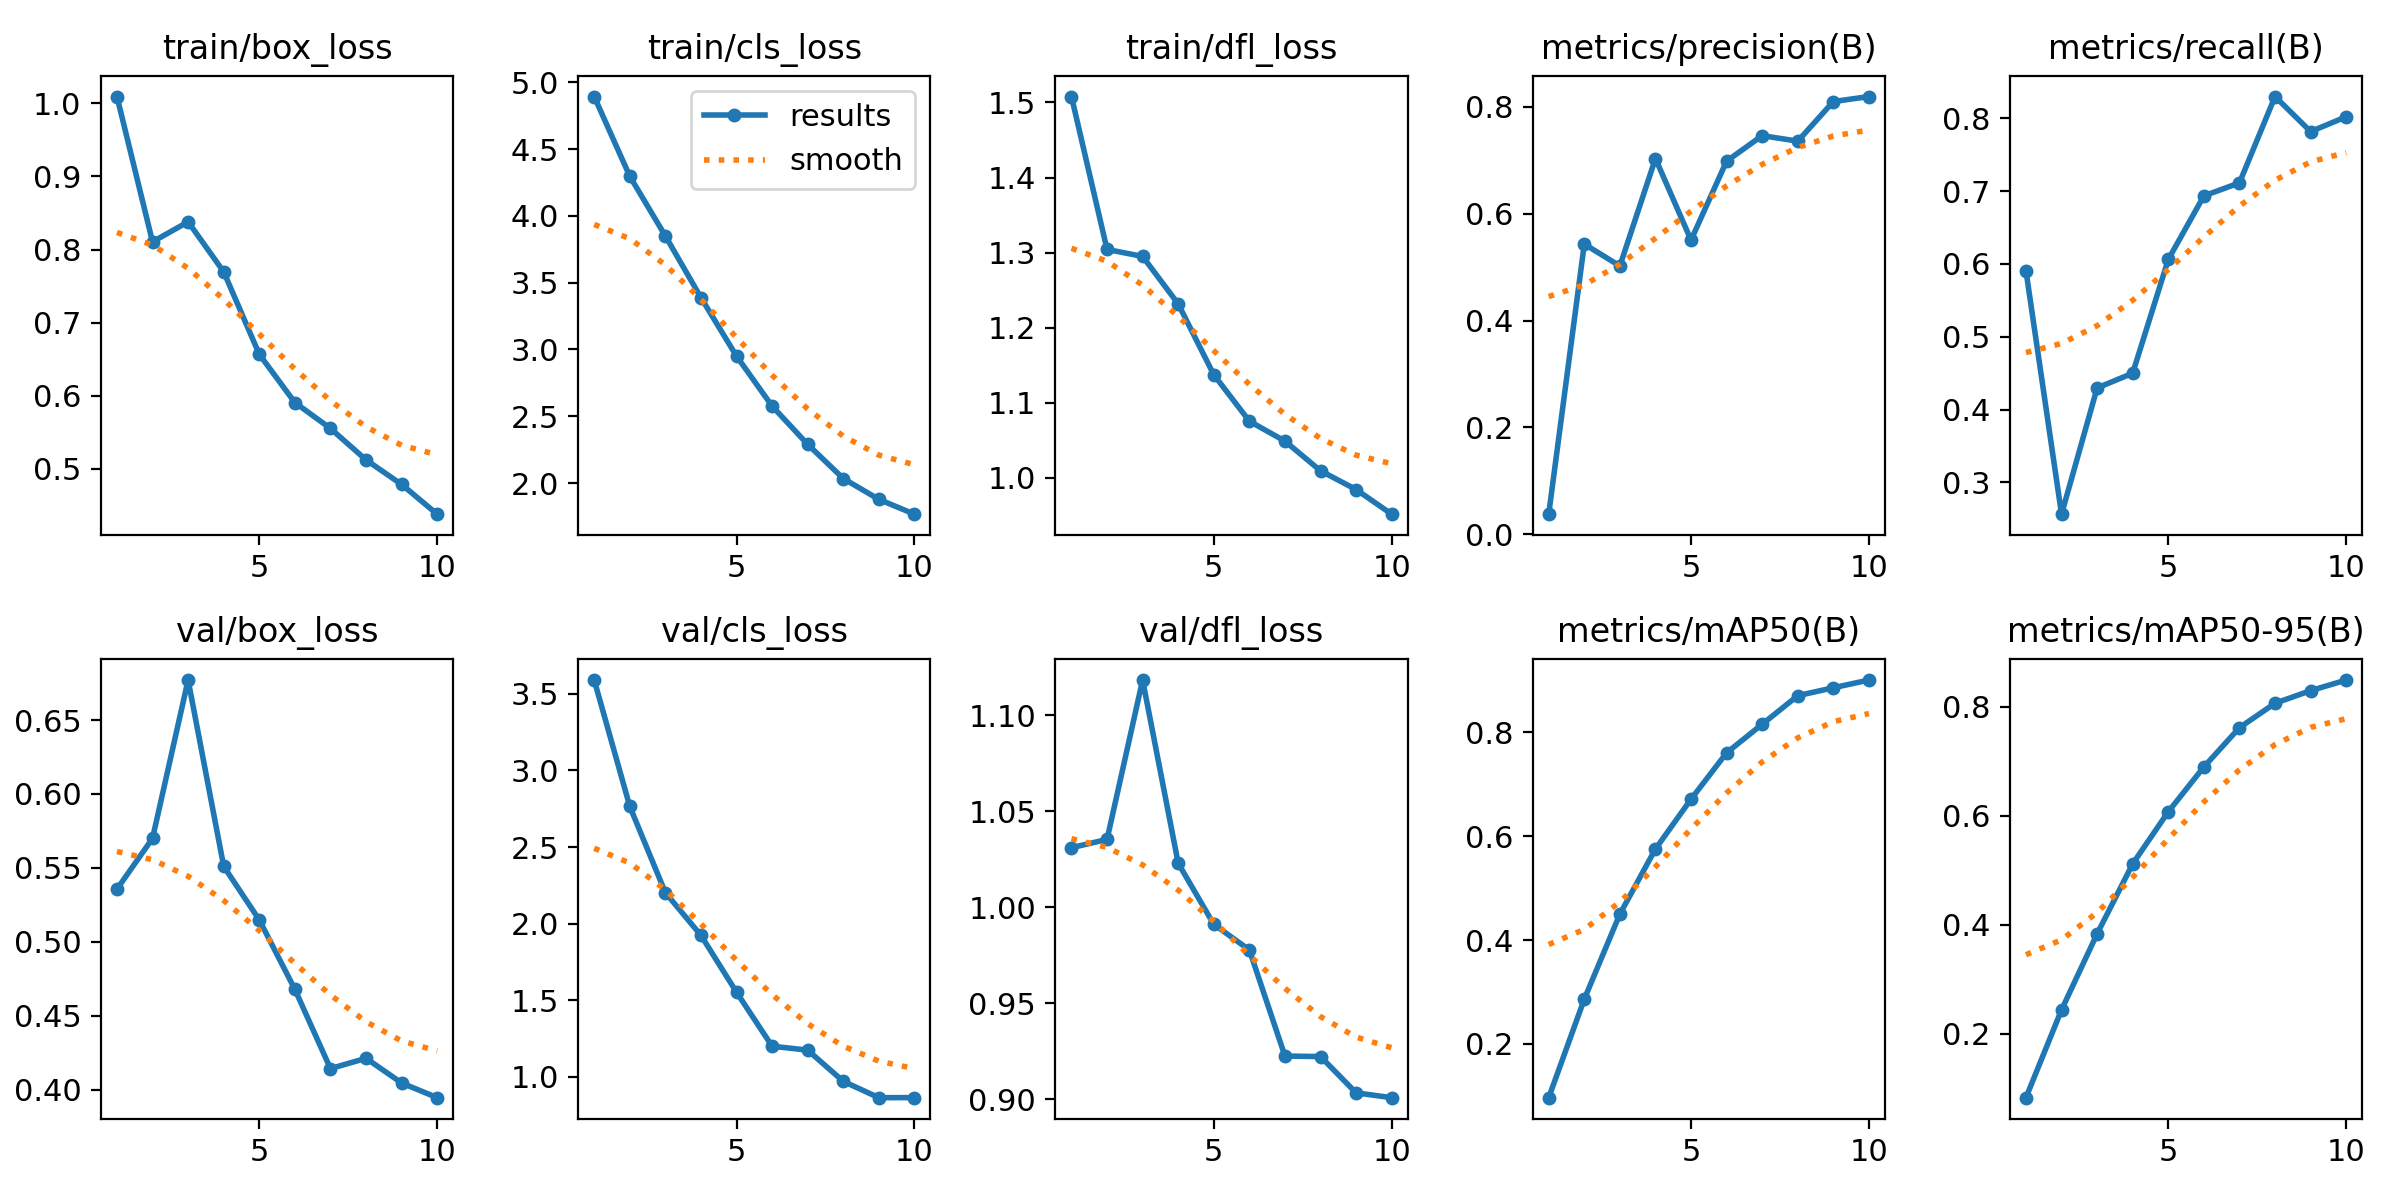

In [7]:
IPyImage(filename=f'/kaggle/working/runs/detect/train/results.png', width=1000)

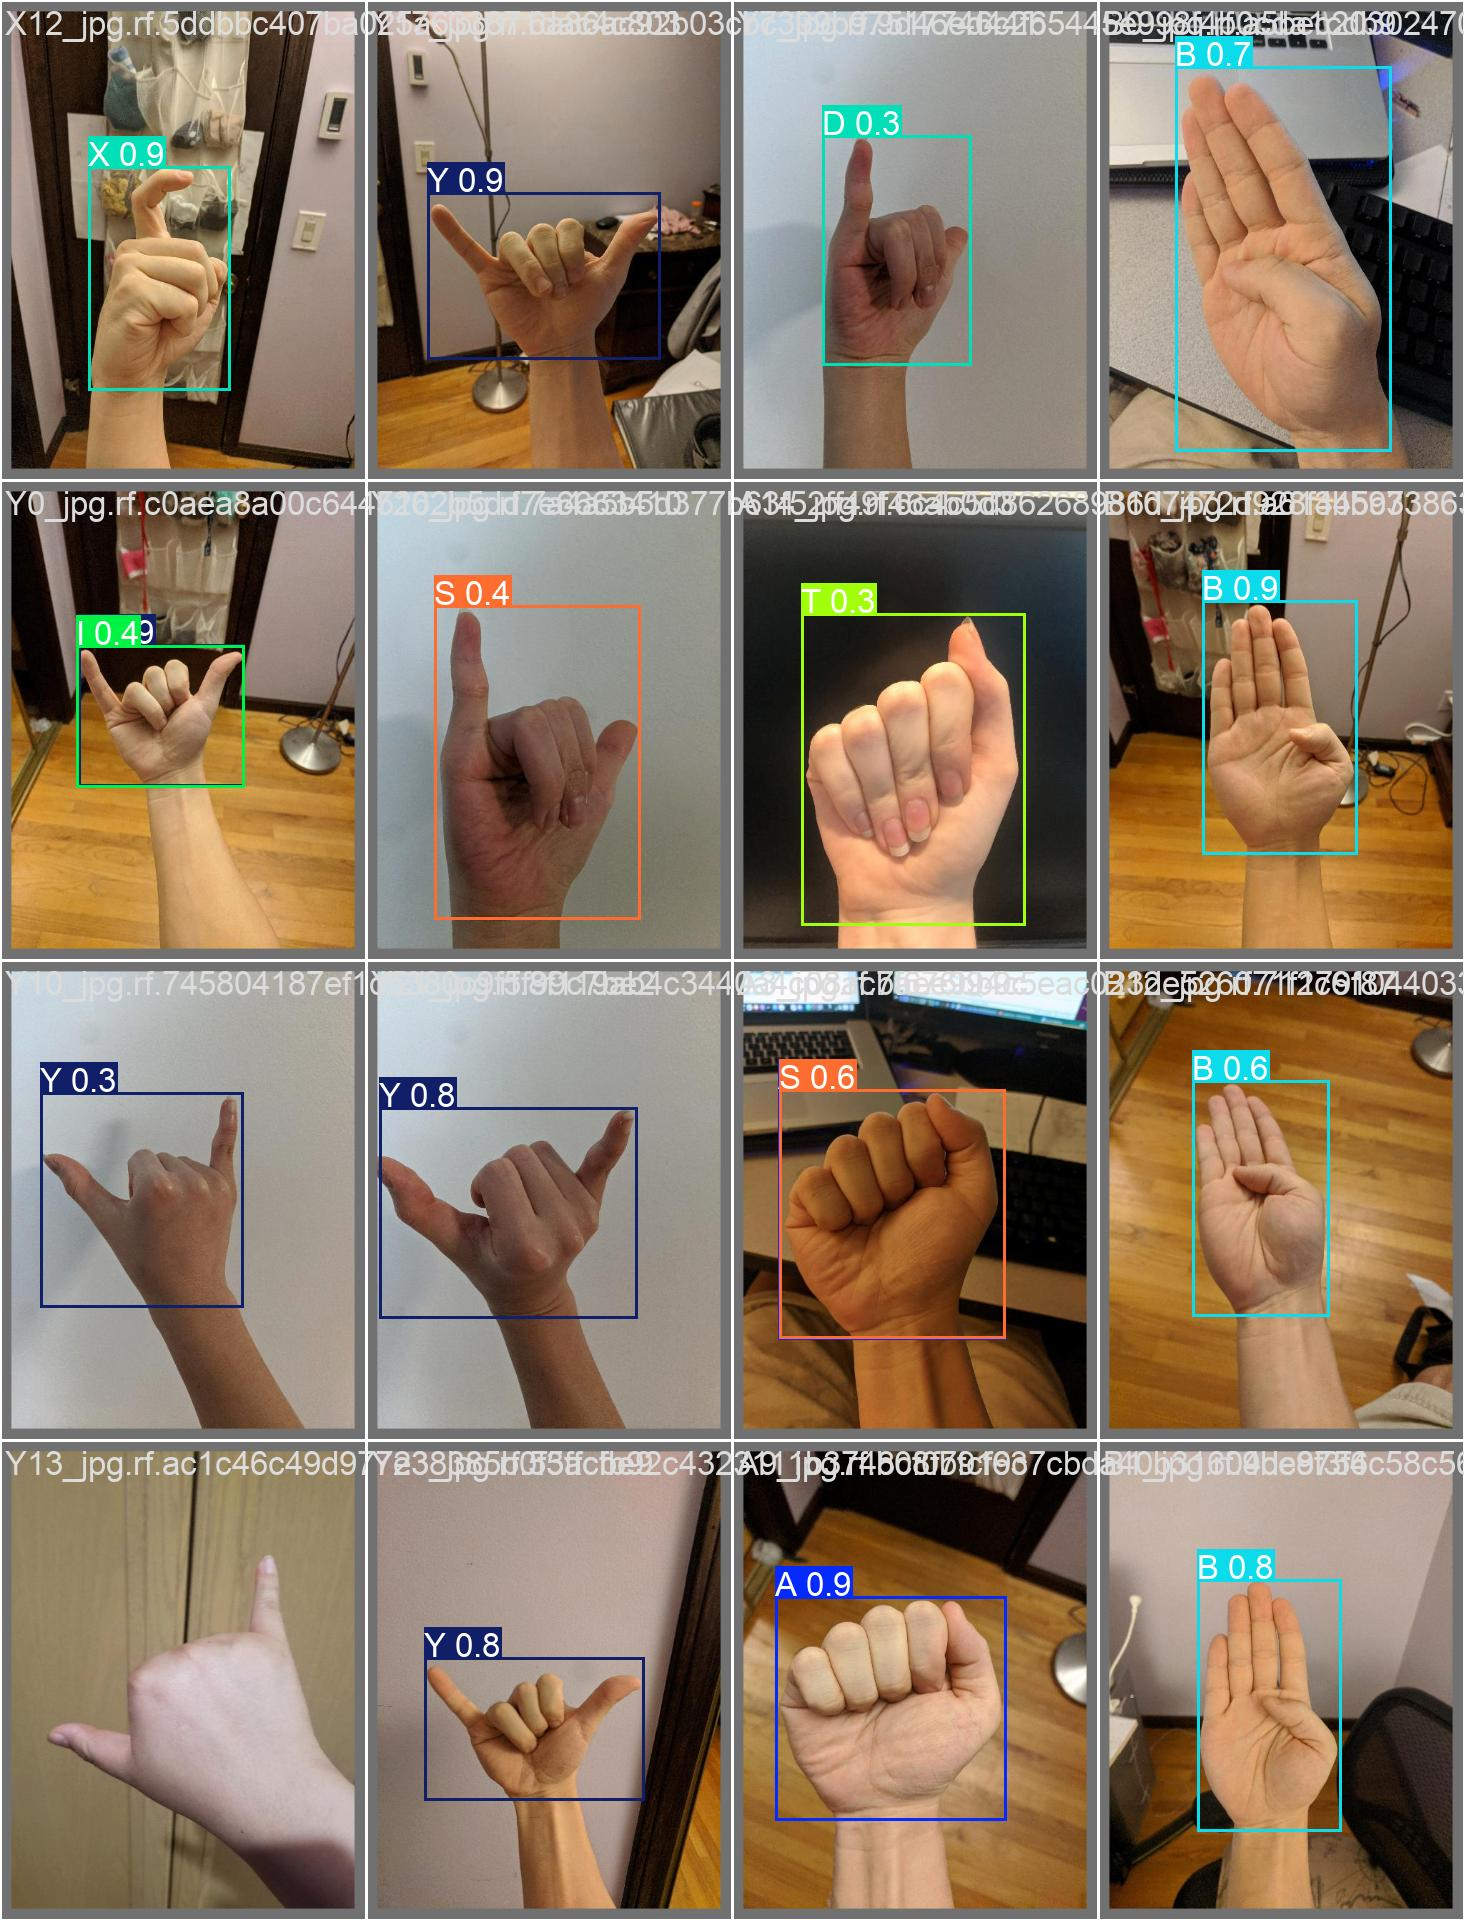

In [8]:
IPyImage(filename=f'/kaggle/working/runs/detect/train/val_batch0_pred.jpg', width=1000)

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Validation of the Model</p> 

In [9]:
# Run the validation task using YOLO in Kaggle
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/working/American-Sign-Language-Letters-1/data.yaml

Ultralytics 8.3.6 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /kaggle/working/American-Sign-Language-Letters-1/valid/labels.cach
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        141        141      0.819      0.802        0.9      0.848
                     A          4          4          1       0.67      0.995      0.995
                     B          9          9          1      0.755      0.984      0.883
                     C          3          3      0.756          1      0.995      0.907
                     D          6          6      0.898      0.833      0.931      0.867
                     E          4          4      0.907          1      0.995      0.995
                     F          8          8      0.859      0.875      0.907      0.894
                     G          5          5      0.919  

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Prediction</p> 

In [ ]:
# Run the prediction task on Test Data
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/American-Sign-Language-Letters-1/test/images save=True

#Results saved to runs/detect/predict
#💡 Learn more at https://docs.ultralytics.com/modes/predict

## Prediction with Random Images

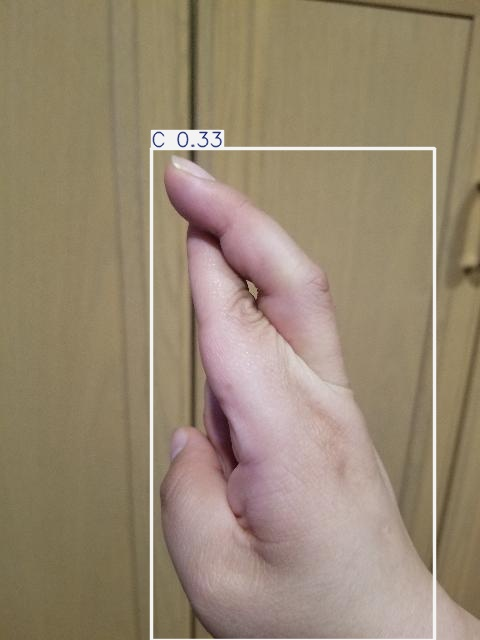

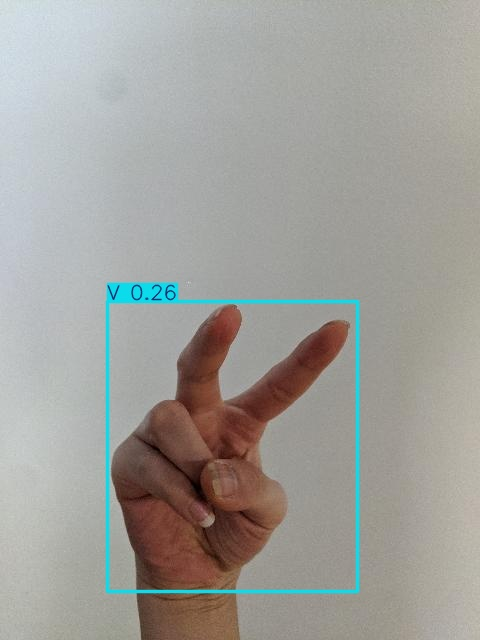

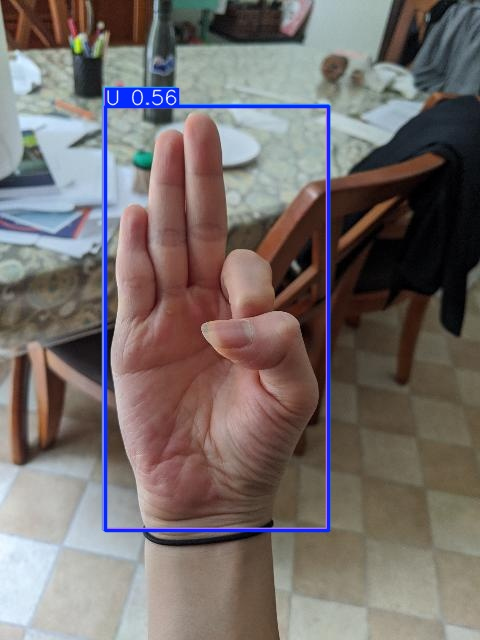

In [16]:
import glob
import os
from IPython.display import Image as IPyImage, display

# Get the latest prediction folder for detection in Kaggle
latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)

# Display images from the prediction folder
for img in glob.glob(f'{latest_folder}/*.jpg')[15:18]:
    display(IPyImage(filename=img, width=300))

## Predictions on Videos

In [ ]:
# Input video path for the first video in Kaggle
input_video_path = "/kaggle/input/asl-videos/asl_video1_40sn.mp4"  # First video path
# Output paths for saving the prediction result
output_video_path = "/kaggle/working/runs/detect/predict/asl_video1_40sn_output.avi"  # YOLO default output in .avi format

# Run YOLO on the first video for object detection
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source="{input_video_path}" save=True

# Results saved to runs/detect/predict2
#💡 Learn more at https://docs.ultralytics.com/modes/predict

In [ ]:
# Convert .avi to .mp4 using FFmpeg
import os

# Path to the input .avi video
input_video = '/kaggle/working/runs/detect/predict2/asl_video1_40sn.avi'
# Path to the output .mp4 video
output_video = '/kaggle/working/runs/detect/predict2/asl_video1_40sn_output.mp4'

# FFmpeg command to convert .avi to .mp4
ffmpeg_command = f"ffmpeg -i {input_video} -vcodec libx264 {output_video}"
os.system(ffmpeg_command)

In [20]:
# Check if the .mp4 file is successfully created
!ls /kaggle/working/runs/detect/predict2/

asl_video1_40sn.avi  asl_video1_40sn_output.mp4


In [22]:
from IPython.display import HTML
import base64

# Path to the saved video (after conversion to .mp4)
save_path = '/kaggle/working/runs/detect/predict2/asl_video1_40sn_output.mp4'  # Adjusted path for first video

# Load and encode the video
mp4 = open(save_path, 'rb').read()
data_url = "data:video/mp4;base64," + base64.b64encode(mp4).decode()

# Embed the video and display it in the notebook
HTML(f"""
<video width=600 controls>
      <source src="{data_url}" type="video/mp4">
</video>
""")

In [ ]:
# Input video path for the second video in Kaggle
input_video_path = "/kaggle/input/asl-videos/asl_video2_30sn.mp4"  # Second video path
# Output paths for saving the prediction result
output_video_path = "/kaggle/working/runs/detect/predict/asl_video2_30sn_output.avi"  # YOLO default output in .avi format

# Run YOLO on the second video for object detection
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source="{input_video_path}" save=True

In [ ]:
# Convert .avi to .mp4 using FFmpeg

import os

# Path to the input .avi video (Video 2)
input_video = '/kaggle/working/runs/detect/predict3/asl_video2_30sn.avi'

# Path to the output .mp4 video (Video 2)
output_video = '/kaggle/working/runs/detect/predict3/asl_video2_30sn_output.mp4'

# FFmpeg command to convert .avi to .mp4
ffmpeg_command = f"ffmpeg -i {input_video} -vcodec libx264 {output_video}"
os.system(ffmpeg_command)

In [26]:
# Check if the .mp4 file is successfully created
!ls /kaggle/working/runs/detect/predict3/

asl_video2_30sn.avi  asl_video2_30sn_output.mp4


In [28]:
from IPython.display import HTML
import base64

# Path to the saved video (after conversion to .mp4)
save_path = '/kaggle/working/runs/detect/predict3/asl_video2_30sn_output.mp4'  # Adjusted path for Video 2

# Load and encode the video
mp4 = open(save_path, 'rb').read()
data_url = "data:video/mp4;base64," + base64.b64encode(mp4).decode()

# Embed the video and display it in the notebook
HTML(f"""
<video width=600 controls>
      <source src="{data_url}" type="video/mp4">
</video>
""") 

<div style="text-align: center; font-weight: bold;font-size:120%;">
 If you find this work helpful, don't forget to give it an 👍 UPVOTE! and join the discussion! 💬
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:140%;
            font-family:Verdana;
            letter-spacing:1px;
            padding: 20px;
            text-align:center;
            font-weight: bold;">
    Thank you...
</div>

---

<div style="text-align: center;">
  <b>Duygu Jones | Data Scientist | 2024 </b>
    
  <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>

    
</div>   